In [314]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [315]:
def getHtml(url):
    session = requests.Session()
    req=session.get(url)

    html=req.text
    return html

In [316]:
url='https://www.worldometers.info/coronavirus/?utm_campaign=homeAdvegas1?#countries'
html=getHtml(url)

In [317]:
def getData(html):
    '''
    (str)->list
    
    html: URL request return value, str
    
    return data, list
    '''
    
    soup = BeautifulSoup(html,'lxml')
    
    divs = soup.find_all('tr', style='')
    
    
    data=[]
    for div in divs:
        if '/a' in str(div):
            data_series=[]
            data_series.append(div.a.string)
            for idx,td in enumerate(div.find_all('td')):
                if idx >=2 and idx <=15:
                    if idx==7:
                        pass
                    elif idx ==14:
                        data_series.append(td.a.string) if td.a != None else data_series.append(np.nan)
                    else:
                        data_series.append(td.string)

            data.append(data_series)
    return data


In [318]:

columns=['Country,Other','Total Cases','New Cases','Total Deaths','New Deaths','Total Recovered',
         'Active Cases','Serious Critical','Tot Cases/1M pop','Deaths/1M pop','Total Tests',
         'Tests/1M pop','Population','Region']

data=getData(html)

pdata=pd.DataFrame(data,columns=columns)
pdata.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region
0,USA,"34,205,248",+874,"612,219",+16,"28,103,890","5,489,139","5,392","102,780","1,840","486,341,242","1,461,353","332,802,010",North America
1,India,"28,909,311","+100,939","349,221","+2,437","27,149,889","1,410,201","8,944","20,760",251,"364,746,522","261,924","1,392,568,209",Asia
2,Brazil,"16,907,425",None,"472,629",None,"15,290,500","1,144,296","8,318","79,022","2,209","49,842,105","232,951","213,959,658",South America
3,France,"5,712,753","+5,070","109,998",+25,"5,409,135","193,620","2,527","87,341","1,682","86,950,045","1,329,358","65,407,534",Europe
4,Turkey,"5,287,980","+5,386","48,164",+96,"5,160,774","79,042","1,096","62,081",565,"55,455,452","651,044","85,179,227",Asia


In [319]:

def cleanComma(pdata,columns):
    for column in columns:
        pdata[column]=pdata[column].str.replace(',','')
        pdata[column]=pdata[column].str.replace('+','')
    
    
cleanComma(pdata,columns)
pdata.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region
0,USA,34205248,874,612219,16,28103890,5489139,5392,102780,1840,486341242,1461353,332802010,North America
1,India,28909311,100939,349221,2437,27149889,1410201,8944,20760,251,364746522,261924,1392568209,Asia
2,Brazil,16907425,None,472629,None,15290500,1144296,8318,79022,2209,49842105,232951,213959658,South America
3,France,5712753,5070,109998,25,5409135,193620,2527,87341,1682,86950045,1329358,65407534,Europe
4,Turkey,5287980,5386,48164,96,5160774,79042,1096,62081,565,55455452,651044,85179227,Asia


In [355]:
def change_to_numeric(pdata,columns):
    for column in columns:
        pdata[column]=pd.to_numeric(pdata[column], downcast='float', errors='coerce').fillna(np.nan)
    
    
columns_change2numeric=['Total Cases','New Cases','Total Deaths','New Deaths','Total Recovered',
         'Active Cases','Serious Critical','Tot Cases/1M pop','Deaths/1M pop','Total Tests',
         'Tests/1M pop','Population']

change_to_numeric(pdata,columns_change2numeric)


pdata['Total Deaths Ratio']=pdata['Total Deaths']/pdata['Total Cases']
pdata.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region,Total Deaths Ratio
0,USA,34205248.0,874.0,612219.0,16.0,28103890.0,5489139.0,5392.0,102780.0,1840.0,486341248.0,1461353.0,3.328020e+08,North America,0.017898
1,India,28909312.0,100939.0,349221.0,2437.0,27149888.0,1410201.0,8944.0,20760.0,251.0,364746528.0,261924.0,1.392568e+09,Asia,0.012080
2,Brazil,16907424.0,0.0,472629.0,0.0,15290500.0,1144296.0,8318.0,79022.0,2209.0,49842104.0,232951.0,2.139597e+08,South America,0.027954
3,France,5712753.0,5070.0,109998.0,25.0,5409135.0,193620.0,2527.0,87341.0,1682.0,86950048.0,1329358.0,6.540754e+07,Europe,0.019255
4,Turkey,5287980.0,5386.0,48164.0,96.0,5160774.0,79042.0,1096.0,62081.0,565.0,55455452.0,651044.0,8.517922e+07,Asia,0.009108


In [356]:

pdata.fillna(0,inplace=True)
pdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country,Other       206 non-null    object 
 1   Total Cases         206 non-null    float32
 2   New Cases           206 non-null    float32
 3   Total Deaths        206 non-null    float32
 4   New Deaths          206 non-null    float32
 5   Total Recovered     206 non-null    float32
 6   Active Cases        206 non-null    float32
 7   Serious Critical    206 non-null    float32
 8   Tot Cases/1M pop    206 non-null    float32
 9   Deaths/1M pop       206 non-null    float32
 10  Total Tests         206 non-null    float32
 11  Tests/1M pop        206 non-null    float32
 12  Population          206 non-null    float32
 13  Region              206 non-null    object 
 14  Total Deaths Ratio  206 non-null    float32
dtypes: float32(13), object(2)
memory usage: 15.3+ KB


In [357]:
pdata.drop_duplicates(['Country,Other'],keep='first',inplace=True)
pdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country,Other       206 non-null    object 
 1   Total Cases         206 non-null    float32
 2   New Cases           206 non-null    float32
 3   Total Deaths        206 non-null    float32
 4   New Deaths          206 non-null    float32
 5   Total Recovered     206 non-null    float32
 6   Active Cases        206 non-null    float32
 7   Serious Critical    206 non-null    float32
 8   Tot Cases/1M pop    206 non-null    float32
 9   Deaths/1M pop       206 non-null    float32
 10  Total Tests         206 non-null    float32
 11  Tests/1M pop        206 non-null    float32
 12  Population          206 non-null    float32
 13  Region              206 non-null    object 
 14  Total Deaths Ratio  206 non-null    float32
dtypes: float32(13), object(2)
memory usage: 15.3+ KB


In [358]:

pdata[pdata['Country,Other']=='India']

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region,Total Deaths Ratio
1,India,28909312.0,100939.0,349221.0,2437.0,27149888.0,1410201.0,8944.0,20760.0,251.0,364746528.0,261924.0,1.392568e+09,Asia,0.01208


In [360]:

pdata_group=pdata.groupby("Region")[['Total Cases','New Cases','Total Deaths','New Deaths','Total Recovered',
         'Active Cases','Serious Critical','Tot Cases/1M pop','Deaths/1M pop','Total Tests',
         'Tests/1M pop','Population']].sum()
pdata_group.index

Index(['Africa', 'Asia', 'Australia/Oceania', 'Europe', 'North America',
       'South America'],
      dtype='object', name='Region')

In [361]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

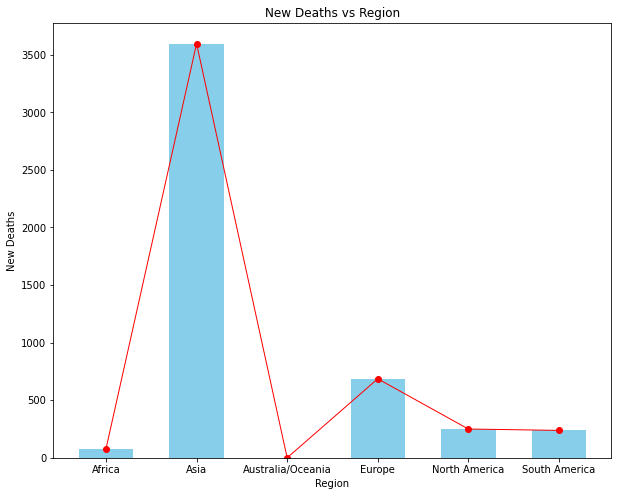

In [362]:
plt.figure(figsize=(10, 8))
plt.plot(pdata_group.index,pdata_group['New Deaths'],'o-',color='red',linewidth='1')
plt.bar(pdata_group.index,pdata_group['New Deaths'],width=0.6, align='center',color='skyblue')
plt.xlabel('Region')
plt.ylabel('New Deaths')
plt.title('New Deaths vs Region')
plt.show()

In [363]:
pdata_asia=pdata[(pdata['Region']=='Asia') & (pdata['New Deaths']>0)]
pdata_asia.sort_values(by='New Deaths', ascending=False, inplace=True )
pdata_asia

D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region,Total Deaths Ratio
1,India,28909312.0,100939.0,349221.0,2437.0,27149888.0,1410201.0,8944.0,20760.0,251.0,364746528.0,261924.0,1.392568e+09,Asia,0.012080
23,Philippines,1269478.0,7228.0,21898.0,166.0,1188243.0,59337.0,1704.0,11444.0,197.0,13665826.0,123193.0,1.109303e+08,Asia,0.017250
17,Indonesia,1856038.0,5832.0,51612.0,163.0,1705971.0,98455.0,0.0,6720.0,187.0,17256564.0,62478.0,2.762014e+08,Asia,0.027808
12,Iran,2966363.0,5612.0,81063.0,122.0,2552401.0,332899.0,3769.0,34903.0,954.0,20688724.0,243432.0,8.498762e+07,Asia,0.027327
39,Nepal,588124.0,3024.0,7898.0,99.0,491009.0,89217.0,0.0,19855.0,267.0,3143062.0,106110.0,2.962089e+07,Asia,0.013429
4,Turkey,5287980.0,5386.0,48164.0,96.0,5160774.0,79042.0,1096.0,62081.0,565.0,55455452.0,651044.0,8.517922e+07,Asia,0.009108
38,Malaysia,616815.0,6241.0,3378.0,87.0,526809.0,86628.0,890.0,18834.0,103.0,12670559.0,386891.0,3.274967e+07,Asia,0.005477
28,Pakistan,932140.0,1629.0,21265.0,76.0,863111.0,47764.0,3303.0,4146.0,95.0,13523599.0,60144.0,2.248526e+08,Asia,0.022813
33,Japan,760323.0,2652.0,13523.0,74.0,703525.0,43275.0,1131.0,6029.0,107.0,14936069.0,118431.0,1.261167e+08,Asia,0.017786
97,Afghanistan,80744.0,1520.0,3195.0,50.0,58622.0,18927.0,1124.0,2032.0,80.0,496794.0,12502.0,3.973702e+07,Asia,0.039570


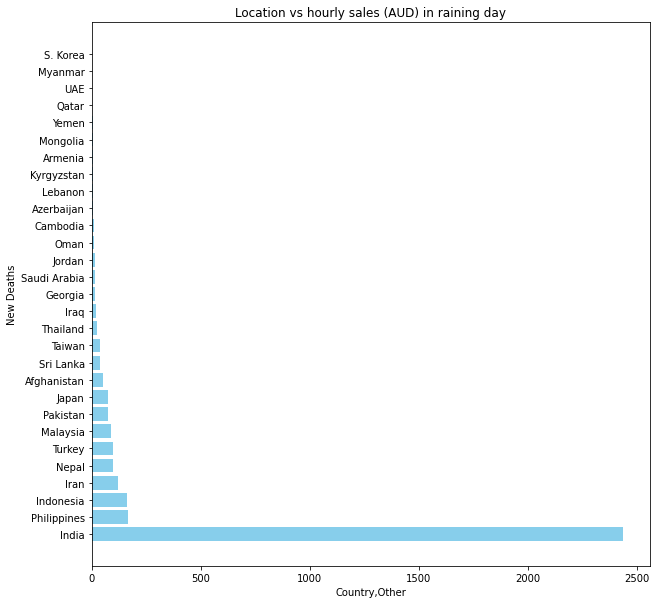

30          Israel
31      Bangladesh
48      Kazakhstan
58          Kuwait
60       Palestine
70         Bahrain
92      Uzbekistan
100         Cyprus
103       Maldives
105      Singapore
126          Syria
149      Hong Kong
155        Vietnam
158    Timor-Leste
186           Laos
187         Bhutan
198        Brunei 
202          Macao
205          China
Name: Country,Other, dtype: object

In [364]:

plt.figure(figsize=(10, 10))
plt.barh(pdata_asia['Country,Other'],pdata_asia['New Deaths'],align='center',color='skyblue')
plt.xlabel('Country,Other')
plt.ylabel('New Deaths')
plt.title('Location vs hourly sales (AUD) in raining day')
plt.show()


pdata[(pdata['Region']=='Asia') & (pdata['New Deaths']==0)]['Country,Other']

In [213]:
from sqlalchemy import create_engine

In [365]:
engine = create_engine('sqlite:///worldometers.sqlite')
pdata.to_sql(name='coronavirus', con=engine ,if_exists='replace',index=False)

pdata[pdata['Region']=='Africa'].to_sql(name='coronavirus_Africa', con=engine ,if_exists='replace',index=False)
pdata[pdata['Region']=='Asia'].to_sql(name='coronavirus_Asia', con=engine ,if_exists='replace',index=False)
pdata[pdata['Region']=='Australia/Oceania'].to_sql(name='coronavirus_Australia/Oceania', con=engine ,if_exists='replace',index=False)
pdata[pdata['Region']=='Europe'].to_sql(name='coronavirus_Europe', con=engine ,if_exists='replace',index=False)
pdata[pdata['Region']=='North America'].to_sql(name='coronavirus_North_America', con=engine ,if_exists='replace',index=False)
pdata[pdata['Region']=='South America'].to_sql(name='coronavirus_South_America', con=engine ,if_exists='replace',index=False)

In [366]:
North_America = "SELECT * from coronavirus_North_America where [New Deaths] >0" 
North_America = pd.read_sql_query(North_America, engine)
North_America

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region,Total Deaths Ratio
0,USA,34205248.0,874.0,612219.0,16.0,28103890.0,5489139.0,5392.0,102780.0,1840.0,486341248.0,1461353.0,332802016.0,North America,0.017898
1,Mexico,2432280.0,2649.0,228754.0,186.0,1937977.0,265549.0,4798.0,18683.0,1757.0,7126804.0,54743.0,130186904.0,North America,0.094049
2,Canada,1392030.0,856.0,25722.0,10.0,1341838.0,24470.0,981.0,36586.0,676.0,35162932.0,924156.0,38048680.0,North America,0.018478
3,Dominican Republic,301078.0,1397.0,3654.0,2.0,245190.0,52234.0,441.0,27499.0,334.0,1585935.0,144852.0,10948639.0,North America,0.012136
4,Guatemala,261958.0,566.0,8294.0,14.0,239176.0,14488.0,5.0,14376.0,455.0,1454870.0,79843.0,18221648.0,North America,0.031662
5,Honduras,241574.0,535.0,6460.0,6.0,86046.0,149068.0,541.0,24037.0,643.0,733593.0,72993.0,10050217.0,North America,0.026741
6,Cuba,148918.0,1087.0,1012.0,9.0,141949.0,5957.0,173.0,13155.0,89.0,4463462.0,394292.0,11320197.0,North America,0.006796
7,Jamaica,48951.0,50.0,970.0,6.0,26295.0,21686.0,7.0,16464.0,326.0,393377.0,132310.0,2973153.0,North America,0.019816
8,Sint Maarten,2479.0,8.0,29.0,1.0,2368.0,82.0,2.0,57216.0,669.0,28642.0,661066.0,43327.0,North America,0.011698


In [367]:
coronavirus = "SELECT * from coronavirus where [New Deaths] >0" 
coronavirus = pd.read_sql_query(coronavirus, engine)
coronavirus

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region,Total Deaths Ratio
0,USA,34205248.0,874.0,612219.0,16.0,28103890.0,5489139.0,5392.0,102780.0,1840.0,486341248.0,1461353.0,3.328020e+08,North America,0.017898
1,India,28909312.0,100939.0,349221.0,2437.0,27149888.0,1410201.0,8944.0,20760.0,251.0,364746528.0,261924.0,1.392568e+09,Asia,0.012080
2,France,5712753.0,5070.0,109998.0,25.0,5409135.0,193620.0,2527.0,87341.0,1682.0,86950048.0,1329358.0,6.540754e+07,Europe,0.019255
3,Turkey,5287980.0,5386.0,48164.0,96.0,5160774.0,79042.0,1096.0,62081.0,565.0,55455452.0,651044.0,8.517922e+07,Asia,0.009108
4,Russia,5126437.0,9163.0,123787.0,351.0,4736446.0,266204.0,2300.0,35114.0,848.0,140400000.0,961693.0,1.459925e+08,Europe,0.024147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Mali,14298.0,2.0,519.0,1.0,9873.0,3906.0,0.0,688.0,25.0,301160.0,14487.0,2.078775e+07,Africa,0.036299
77,Taiwan,11298.0,335.0,260.0,36.0,1133.0,9905.0,0.0,474.0,11.0,1145020.0,47996.0,2.385678e+07,Asia,0.023013
78,Yemen,6787.0,7.0,1329.0,4.0,3571.0,1887.0,23.0,223.0,44.0,72643.0,2387.0,3.043198e+07,Asia,0.195816
79,Burundi,4905.0,24.0,8.0,2.0,773.0,4124.0,0.0,402.0,0.7,309390.0,25325.0,1.221667e+07,Africa,0.001631


In [372]:
coronavirus_group=coronavirus.groupby('Region')['Total Cases','Total Deaths'].sum()
coronavirus_group['Total Deaths Ratio']=coronavirus_group['Total Deaths']/coronavirus_group['Total Cases']*100
coronavirus_group

D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total Cases,Total Deaths,Total Deaths Ratio
Region,,,
Africa,1482793.0,28562.0,1.926230
Asia,49059666.0,673634.0,1.373091
Europe,39744445.0,932655.0,2.346630
North America,39034516.0,887114.0,2.272640
South America,2246043.0,65727.0,2.926346



Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [07/Jun/2021 03:24:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2021 03:24:01] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2021 03:24:01] "GET /mpld3.js HTTP/1.1" 200 -



stopping Server...


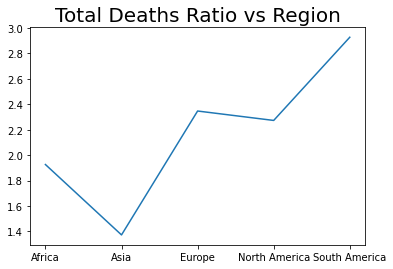

In [384]:
import mpld3
from mpld3 import plugins

# plt.figure(figsize=(10, 8))
# plt.plot(coronavirus_group.index,coronavirus_group['Total Deaths Ratio'],'*-',color='red',linewidth='1')
# plt.xlabel('Region')
# plt.ylabel('Total Deaths Ratio/%')
# plt.title('Total Deaths Ratio vs Region')
# plt.show()

fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)
ax.plot(coronavirus_group.index,coronavirus_group['Total Deaths Ratio'])
ax.grid(color='white', linestyle='solid')

ax.set_title("Total Deaths Ratio vs Region", size=20)
# mpld3.display()
mpld3.show()
